In [57]:
from optuna.samplers import RandomSampler,TPESampler
from optuna.visualization import plot_optimization_history, plot_parallel_coordinate, plot_slice, plot_contour, plot_param_importances
from optuna.study import create_study
from seedtools import load_seed
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

## CONTENTS 
- Best hyperparamteres 
- Best Model

*each of it contains*:  
- `objective function`
-  study 
- testing 
- visualization 

In [32]:
data =  load_seed("pima_indians_diabetest.csv").data 
ss = StandardScaler()


x =  ss.fit_transform(data.drop(columns=["Outcome"]))
y =  data["Outcome"]


x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

Shape: [768, 9]
Columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
Description: Data Description is not yed provided


## Best Parameters 

| Feature          | RandomSampler | TPESampler         | GridSampler         |
| ---------------- | ------------- | ------------------ | ------------------- |
| Type             | Pure random   | Bayesian           | Exhaustive          |
| Learns from past | ❌             | ✅                  | ❌                   |
| Speed            | 🚀 Fast       | ⚡ Efficient        | 🐢 Slow (if large)  |
| Best for         | Quick tests   | Most real problems | Small search spaces |

SAMPLERS JUST FOR BEST PARAMTERES 


**`Objective function`**

In [ ]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_int('max_depth', 3, 20)


    model = RandomForestClassifier(n_estimators=n_estimators,max_depth=max_depth,random_state=42)
    model.fit(x_train,y_train)
    score =model.score(x_test,y_test)

    return score  # for optuna 

study = create_study(direction='maximize', sampler=RandomSampler()) # ACC -> MAXIMIZE || ERROR -> MINIMIZE 
study.optimize(objective, n_trials=50)

[I 2025-07-03 18:16:52,962] A new study created in memory with name: no-name-d56a6bb1-922a-4505-b345-7d746866d4c7
[I 2025-07-03 18:16:53,162] Trial 0 finished with value: 0.7489177489177489 and parameters: {'n_estimators': 160, 'max_depth': 12}. Best is trial 0 with value: 0.7489177489177489.
[I 2025-07-03 18:16:53,230] Trial 1 finished with value: 0.7402597402597403 and parameters: {'n_estimators': 57, 'max_depth': 8}. Best is trial 0 with value: 0.7489177489177489.
[I 2025-07-03 18:16:53,353] Trial 2 finished with value: 0.7445887445887446 and parameters: {'n_estimators': 109, 'max_depth': 19}. Best is trial 0 with value: 0.7489177489177489.
[I 2025-07-03 18:16:53,487] Trial 3 finished with value: 0.7489177489177489 and parameters: {'n_estimators': 119, 'max_depth': 8}. Best is trial 0 with value: 0.7489177489177489.
[I 2025-07-03 18:16:53,548] Trial 4 finished with value: 0.7445887445887446 and parameters: {'n_estimators': 52, 'max_depth': 7}. Best is trial 0 with value: 0.748917748

**study**

In [36]:

print(f'Best trial accuracy: {study.best_trial.value}')
print(f'Best hyperparameters: {study.best_trial.params}')

Best trial accuracy: 0.7662337662337663
Best hyperparameters: {'n_estimators': 109, 'max_depth': 7}


In [55]:
study.trials_dataframe()[["value","params_max_depth","params_n_estimators"]].head(3)

,value,params_max_depth,params_n_estimators
0,0.748918,12,160
1,0.740260,8,57
2,0.744589,19,109


**Model testing**

In [37]:

rf = RandomForestClassifier(**study.best_trial.params, random_state=42)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)


print(classification_report(y_test,rf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       151
           1       0.66      0.68      0.67        80

    accuracy                           0.77       231
   macro avg       0.74      0.74      0.74       231
weighted avg       0.77      0.77      0.77       231



**Visualization**

In [47]:
print(f"After {study.best_trial.number} Trials , trials are not needed")
plot_optimization_history(study).show()

After 10 Trials , trials are not needed


**remove image during coding** 👇
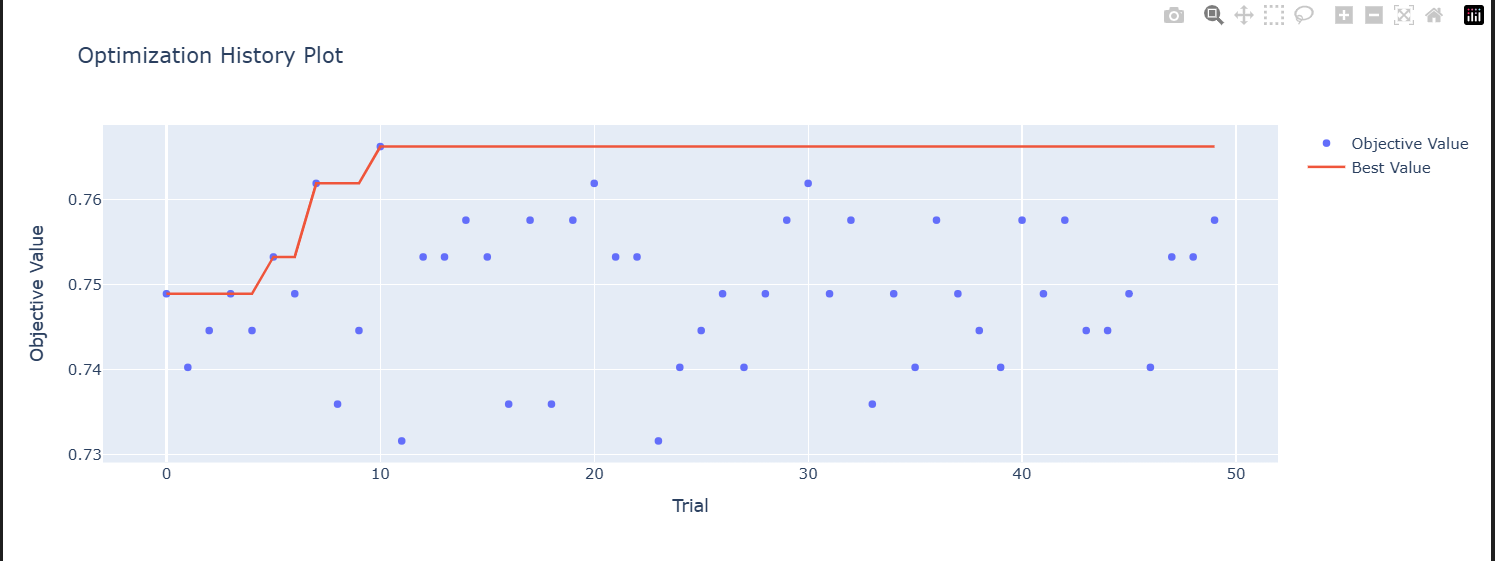

In [48]:
plot_contour(study).show()

**remove image during coding** 👇
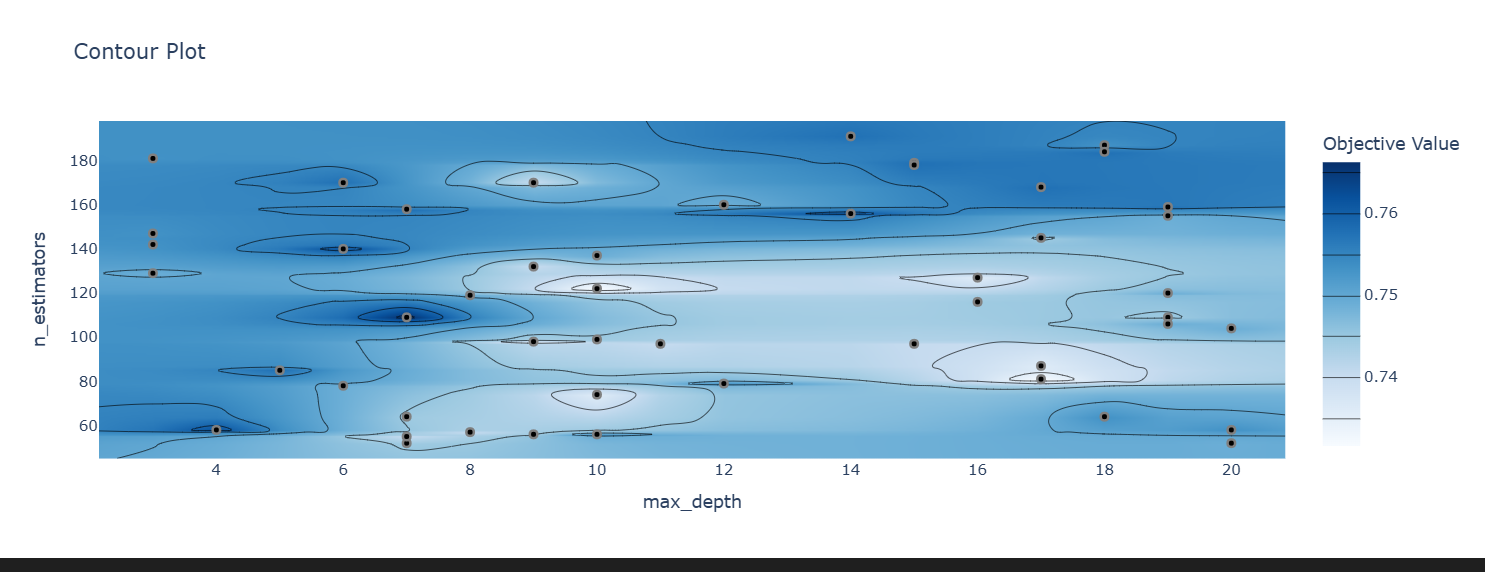

In [49]:
plot_param_importances(study).show()

**remove image during coding** 👇
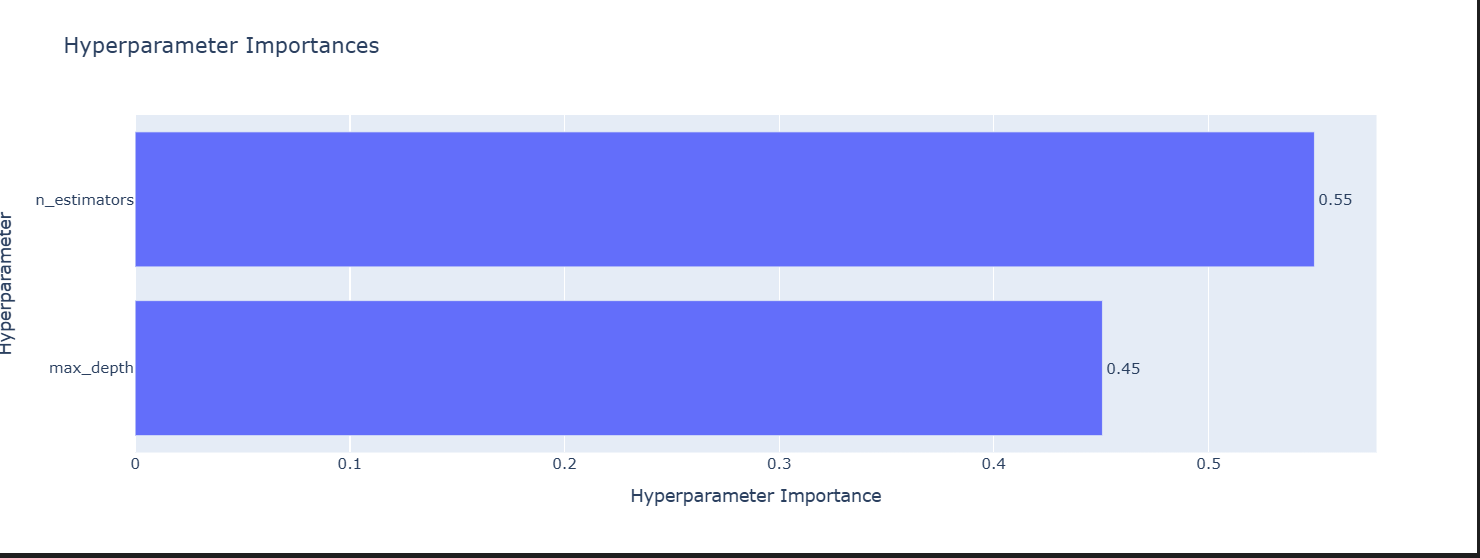

## Best Model 

**`Objective function`**

In [69]:
def objective(trial):
    classifier_name = trial.suggest_categorical('classifier', ['SVM', 'RandomForest', 'LogisticRegression'])

    if classifier_name == 'SVM':
        C = trial.suggest_float('C', 0.1, 100, log=True)
        kernel = trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly', 'sigmoid'])
        gamma = trial.suggest_categorical('gamma', ['scale', 'auto'])

        model = SVC(C=C, kernel=kernel, gamma=gamma, random_state=42)

    elif classifier_name == 'RandomForest':
        n_estimators = trial.suggest_int('n_estimators', 50, 300)
        max_depth = trial.suggest_int('max_depth', 3, 20)
        min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
        min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
        bootstrap = trial.suggest_categorical('bootstrap', [True, False])

        model = RandomForestClassifier(n_estimators=n_estimators,max_depth=max_depth,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf,bootstrap=bootstrap,random_state=42
        )

    elif classifier_name == 'LogisticRegression':
        C = trial.suggest_float('C', 1e-4, 100.0, log=True)
        penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])
        solver = trial.suggest_categorical('solver', ['liblinear', 'saga'])
        model = LogisticRegression(C=C,penalty=penalty,solver=solver,max_iter=1000,random_state=42)

    model.fit(x_train, y_train)
    score = model.score(x_test, y_test)

    return score


In [70]:
study = create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2025-07-03 18:41:35,678] A new study created in memory with name: no-name-58a7a5f7-ec36-423f-a20c-70f8d6bc685d
[I 2025-07-03 18:41:35,786] Trial 0 finished with value: 0.7532467532467533 and parameters: {'classifier': 'RandomForest', 'n_estimators': 101, 'max_depth': 15, 'min_samples_split': 10, 'min_samples_leaf': 9, 'bootstrap': False}. Best is trial 0 with value: 0.7532467532467533.
[I 2025-07-03 18:41:35,789] Trial 1 finished with value: 0.6536796536796536 and parameters: {'classifier': 'LogisticRegression', 'C': 0.002404191607006383, 'penalty': 'l1', 'solver': 'liblinear'}. Best is trial 0 with value: 0.7532467532467533.
[I 2025-07-03 18:41:35,801] Trial 2 finished with value: 0.7229437229437229 and parameters: {'classifier': 'SVM', 'C': 3.4730329971709923, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 0 with value: 0.7532467532467533.
[I 2025-07-03 18:41:35,809] Trial 3 finished with value: 0.7316017316017316 and parameters: {'classifier': 'SVM', 'C': 0.3777761306928868, '

**study**

In [71]:

print(f'Best trial accuracy: {study.best_trial.value}')
print(f'Best hyperparameters: {study.best_trial.params}')

Best trial accuracy: 0.7792207792207793
Best hyperparameters: {'classifier': 'RandomForest', 'n_estimators': 285, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 4, 'bootstrap': False}


In [82]:
study.trials_dataframe()[['value','params_C', 'params_bootstrap', 'params_classifier', 'params_gamma', 'params_kernel', 'params_max_depth', 'params_min_samples_leaf', 'params_min_samples_split', 'params_n_estimators', 'params_penalty', 'params_solver']].head(3)

,value,params_C,params_bootstrap,params_classifier,params_gamma,params_kernel,params_max_depth,params_min_samples_leaf,params_min_samples_split,params_n_estimators,params_penalty,params_solver
0,0.753247,NaN,False,RandomForest,NaN,NaN,15.0,9.0,10.0,101.0,NaN,NaN
1,0.653680,0.002404,NaN,LogisticRegression,NaN,NaN,NaN,NaN,NaN,NaN,l1,liblinear
2,0.722944,3.473033,NaN,SVM,scale,rbf,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
study.trials_dataframe()['params_classifier'].value_counts()

params_classifier
RandomForest          80
LogisticRegression    10
SVM                   10
Name: count, dtype: int64

In [73]:
study.trials_dataframe().groupby('params_classifier')['value'].mean()

params_classifier
LogisticRegression    0.693939
RandomForest          0.764340
SVM                   0.716017
Name: value, dtype: float64

**Model testing**

In [101]:
best_param =  study.best_trial.params

del  best_param["classifier"]

model =  RandomForestClassifier(**best_param)
model.fit(x_train,y_train)

print("Score :",model.score(x_test,y_test))
print(classification_report(y_test,model.predict(x_test)))


Score : 0.7705627705627706
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       151
           1       0.71      0.56      0.63        80

    accuracy                           0.77       231
   macro avg       0.75      0.72      0.73       231
weighted avg       0.76      0.77      0.76       231



**Visualization**

In [85]:
print(f"After {study.best_trial.number} Trials , trials are not needed")
plot_optimization_history(study).show()

After 65 Trials , trials are not needed


**remove image during coding** 👇
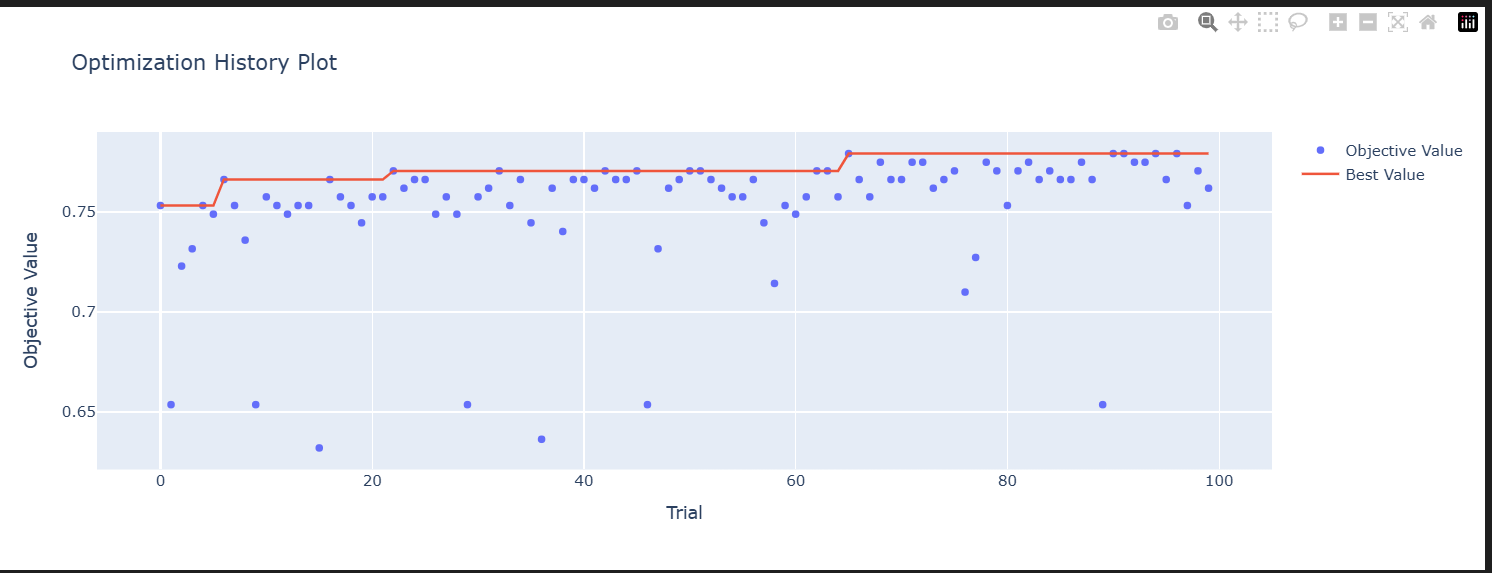

In [86]:
plot_param_importances(study).show()

**remove image during coding** 👇
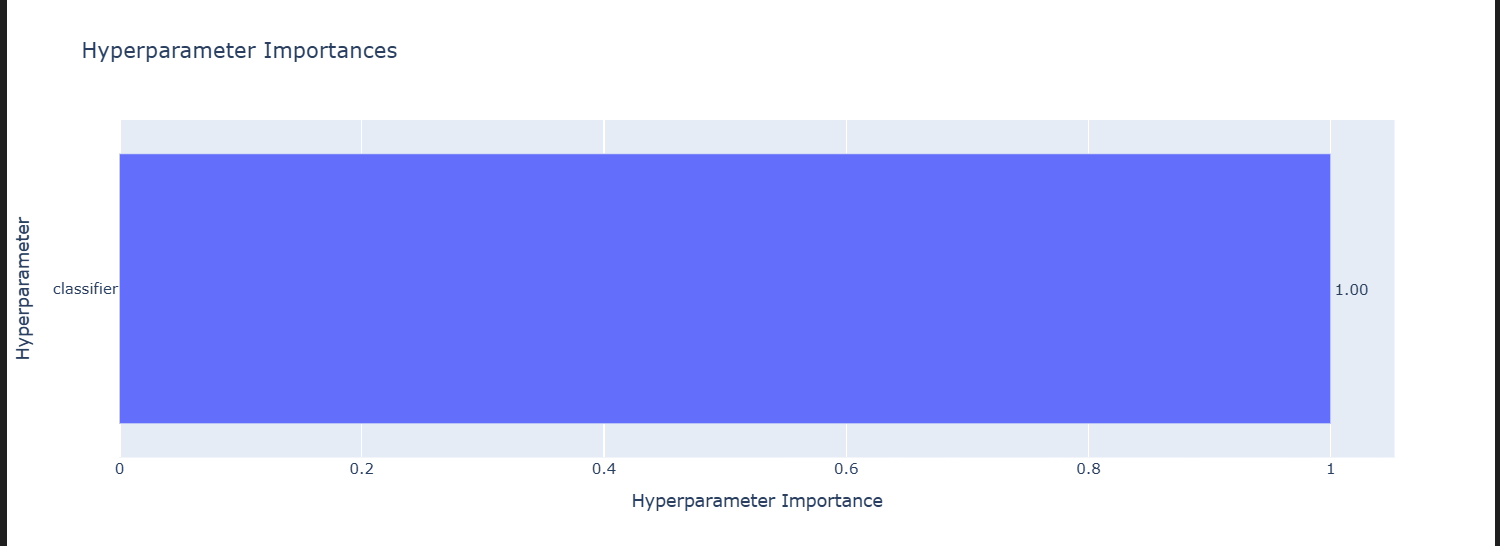